Problem 1


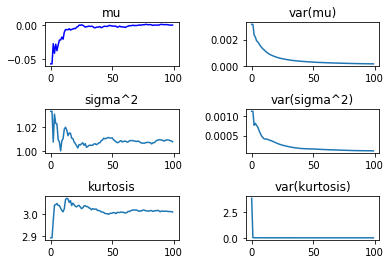

<Figure size 1400x1400 with 0 Axes>

In [65]:
#-----------------------------Problem 1----------------------------------
import numpy as np
from matplotlib import pyplot
import random
print('Problem 1')
K = 100
M = 1000
random.seed(1)
x = np.zeros((M,K))
mu = np.zeros((1,K))
sig2 = np.zeros((1,K))
kurt = np.zeros((1,K))
Vmu = np.zeros((1,K))
Vsig2 = np.zeros((1,K))
Vkurt = np.zeros((1,K))

for j in range(K):
    x[:,j] = np.array( [random.normalvariate(0,1) for x in range(M)] )
    if j == 0:
        mu[0,j] = np.mean(x[:,0])
        sig2[0,j] = np.mean( ( x[:,0] - mu[0,j] )**2 )
        kurt[0,j] = np.mean( ( ( x[:,j] - mu[0,j] )**4 )/( sig2[0,j]**2 ) )
        Vmu[0,j] =  (mu[0,0] - 0)**2 
        Vsig2[0,j] =  (sig2[0,0] - 1)**2 
        Vkurt[0,j] =  (sig2[0,0] - 3)**2 
    else:
        mu[0,j] = np.mean(x[:,0:j])
        sig2[0,j] = np.mean( ( x[:,0:j] - mu[0,j] )**2 )
        kurt[0,j] = np.mean( ( ( x[:,0:j] - mu[0,j] )**4 )/( sig2[0,j]**2 ) )
        Vmu[0,j] = ( np.sum( (mu[0,0:j+1] - 0)**2 ) )/(j+1)
        Vsig2[0,j] = ( np.sum( (sig2[0,0:j+1] - 1)**2 ) )/(j+1)
        Vkurt[0,j] = ( np.sum( (kurt[0,0:j+1] - 3)**2 ) )/(j+1)
    
t = range(0,K)
#Plot
pyplot.figure(1);
pyplot.subplot(3,2,1);
pyplot.plot(t, mu[0,:], 'b');
pyplot.title('mu');
pyplot.subplot(3,2,2);
pyplot.plot(t, Vmu[0,:]);
pyplot.title('var(mu)');
pyplot.subplot(3,2,3);
pyplot.plot(t, sig2[0,:]);
pyplot.title('sigma^2');
pyplot.subplot(3,2,4);
pyplot.plot(t, Vsig2[0,:]);
pyplot.title('var(sigma^2)');
pyplot.subplot(3,2,5);
pyplot.plot(t, kurt[0,:]);
pyplot.title('kurtosis');
pyplot.subplot(3,2,6);
pyplot.plot(t, Vkurt[0,:]);
pyplot.title('var(kurtosis)');
pyplot.subplots_adjust(hspace=1,wspace=0.5)
pyplot.figure(num=None, figsize=(10, 10), dpi=140, facecolor='w', edgecolor='k')
pyplot.show()

Problem 2


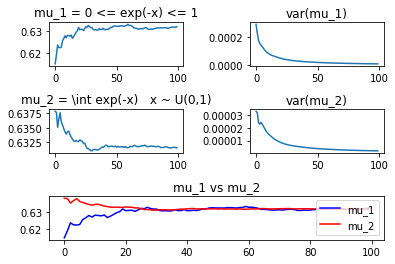

<Figure size 1400x1400 with 0 Axes>

In [66]:
#-----------------------------Problem 2----------------------------------
import numpy as np
from matplotlib import pyplot
import random
print('Problem 2')
K = 100
M = 1000
random.seed(1)
x = np.zeros((M,K))
y = np.zeros((M,K))
mu1 = np.zeros((1,K))
mu2 = np.zeros((1,K))
sig2 = np.zeros((1,K))
kurt = np.zeros((1,K))
Vmu1 = np.zeros((1,K))
Vmu2 = np.zeros((1,K))
Vsig2 = np.zeros((1,K))
Vkurt = np.zeros((1,K))

Tr = 1-np.exp(-1) #True Value
for j in range(K):
    x[:,j] = np.array( [random.expovariate(1) for x in range(M)] )
    y[:,j] = np.array( [random.uniform(0,1) for x in range(M)] )
    mu1[0,j] = ( np.sum( (x[:,0:j+1] >= 0) & (x[:,0:j+1] <= 1)) )/(np.size(x[:,0:j+1]))
    Vmu1[0,j] = (np.sum( ( mu1[0,0:j+1] - Tr )**2 ) )/(j+1)
    mu2[0,j] = (np.sum( np.exp( -y[:,0:j+1] )  ) )/(np.size(x[:,0:j+1]))
    Vmu2[0,j] = (np.sum( ( mu2[0,0:j+1] - Tr )**2 ) )/(j+1)
        
t = range(0,K)
#Plot
pyplot.subplot(3,2,1);
pyplot.plot(t, mu1[0,:]);
pyplot.title('mu_1 = 0 <= exp(-x) <= 1');
pyplot.subplot(3,2,2);
pyplot.plot(t, Vmu1[0,:]);
pyplot.title('var(mu_1)');
pyplot.subplot(3,2,3);
pyplot.plot(t, mu2[0,:]);
pyplot.title('mu_2 = \int exp(-x)   x ~ U(0,1)');
pyplot.subplot(3,2,4);
pyplot.plot(t, Vmu2[0,:]);
pyplot.title('var(mu_2)');
pyplot.subplot(3,1,3);
pyplot.plot(t, mu1[0,:], 'b', t, mu2[0,:], 'r')
pyplot.title('mu_1 vs mu_2');
pyplot.legend(('mu_1', 'mu_2'),loc='lower right');
pyplot.subplots_adjust(hspace=1,wspace=0.5)
pyplot.figure(num=2, figsize=(10, 10), dpi=140, facecolor='w', edgecolor='k')
pyplot.show()


Problem 3


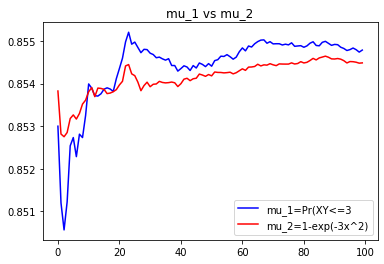

<Figure size 1400x1400 with 0 Axes>

In [67]:
#-----------------------------Problem 3----------------------------------
import numpy as np
from matplotlib import pyplot
import random
print('\nProblem 3')
K = 100
M = 10000
random.seed(1)
x = np.zeros((M,K))
y = np.zeros((M,K))
z = np.zeros((M,K))
P3 = np.zeros((M,K))
mu1 = np.zeros((1,K))
mu2 = np.zeros((1,K))

for j in range(K):
    x[:,j] = np.array( [random.expovariate(1) for x in range(M)] )
    for i in range(M):
        y[i,j] = random.expovariate(1/x[i,j])
        z[i,j] = x[i,j]*y[i,j]
        P3[i,j] = (z[i,j]<=3)
    mu1[0,j] = ( np.sum( P3[:,0:j+1] ) )/( np.size(P3[:,0:j+1]) )
    mu2[0,j] = ( np.sum( 1-np.exp(-3/( x[:,0:j+1]**2 ) ) ) )/( np.size(x[:,0:j+1]) )
    
t = range(0,K)
#Plot
pyplot.plot(t, mu1[0,:], 'b', t, mu2[0,:], 'r')
pyplot.title('mu_1 vs mu_2');
pyplot.legend(('mu_1=Pr(XY<=3', 'mu_2=1-exp(-3x^2)'),loc='lower right');
pyplot.subplots_adjust(hspace=1,wspace=0.5)
pyplot.figure(num=2, figsize=(10, 10), dpi=140, facecolor='w', edgecolor='k')
pyplot.show()